#IMPORTS
###importing Numpy





In [24]:
import numpy as np

###Creating a class KNearestNeighbour that contains all the functions we will be using to predict 
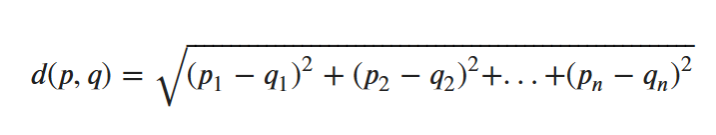
###Creating a function euclidean_distance to find the distance between two vectors in numpy array using the above formula

###creating a function predict() that takes train set and the test row as arguments and returns a sorted list of distances
###iterating through train_set and calculating the distance between that train set row and test instance row and appending the tuple of row and distance to a list
###the distances are sorted by their second element of tuple(which is the actual distances)
###now that the distances are sorted, a new list neighbours[] is initialized which stores the k train_set rows of the shortest distances
###the evaluate() function calculates the accuracy of the algorithm which takes the actual value and predicted value as parameters and iterates through two loops at the same time and checks if they are equal or not


In [25]:
class KNearestNeighbours(object):
    def __init__(self, k):
        self.k=k

    @staticmethod
    def _euclidean_distance(v1,v2):
        v1,v2 = np.array(v1), np.array(v2)
        distance=0
        for i in range(len(v1)-1):
            distance+=(v1[i]-v2[i])**2
        return np.sqrt(distance)
        

    def predict(self,train_set, test_instance):
        distances=[]
        #for every train set row 
        for i in range(len(train_set)):
            #for each numpy array , slicing up to -1
            dist=self._euclidean_distance(train_set[i][:-1], test_instance)
            distances.append((train_set[i], dist))
        #sorting distances list of tuple by distance
        distances.sort(key=lambda x:x[1])

        #list to store k nearest neighbours 
        neighbours=[]
        for i in range(self.k):
            neighbours.append(distances[i][0])
        classes={}
        for i in range(len(neighbours)):
            response=neighbours[i][-1]
            if response in classes:
                classes[response]+=1
            else:
                classes[response]=1

        sorted_classes=sorted(classes.items(), key=lambda x:x[1], reverse=True)
        return sorted_classes[0][0]
    

    @staticmethod   
    def evaluate(y_true, y_pred):
        n_correct=0
        #iterating two lists at the same time
        for act, pred in zip(y_true, y_pred):
            if act==pred:
                n_correct+=1
        return n_correct/len(y_true)


###importing pandas and sklearn(only for dataset)

In [26]:
import pandas as pd
from sklearn.datasets import load_iris

###iris_dataset variable stores the dataset as a bunch object. A bunch object is similar to a python dictionary in ScikitLearn
###Y_iris stores the target columns and the dataset is converted to a pandas dataframe for easy access
###the dataset is modified so as to include the target column as well
###Here:
###class 0 - Iris-sentosa
###class 1 - Iris-versicolor
###class 2 - Iris-virginica


In [29]:
iris_dataset=load_iris()
Y_iris=iris_dataset.target
iris_dataset=pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_dataset=pd.concat([iris_dataset,pd.Series(Y_iris)], axis=1)
iris_dataset.rename(columns={0: 'class'}, inplace=True)
print(iris_dataset.isnull().sum()) #checking if there are any missing values to avoid errors
print("\n",iris_dataset)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  class
0                  5.1               3.5  ...               0.2      0
1                  4.9               3.0  ...               0.2      0
2                  4.7               3.2  ...               0.2      0
3                  4.6               3.1  ...               0.2      0
4                  5.0               3.6  ...               0.2      0
..                 ...               ...  ...               ...    ...
145                6.7               3.0  ...               2.3      2
146                6.3               2.5  ...               1.9      2
147                6.5               3.0  ...               2.0      2
148                6.2               3.4  ...               2.3      2
149                5.9               3.0  ...               1.8      2

[150 rows x 5 col

###the function train_test_split is to split the entire data into training data and testing data
###the test_size will be 0.25, that is, 25% of the data will be used for testing
###.sample() from Pandas takes 0.25 as an argument and returns a random sample from the entire dataset
###now, iterating through the dataset(index only), it is checked is that particular row is present in the test_set or not, if yes the loop is goes to next iteration, if no, that particular row is added to train_set


In [28]:
def train_test_split(dataset, test_size=0.25):
    n_test=int(len(dataset)*test_size)
    test_set=dataset.sample(n_test)
    train_set=[]
    for ind in dataset.index:
        if ind in test_set.index:
            continue
        train_set.append(dataset.iloc[ind])

    train_set=pd.DataFrame(train_set).astype(float).values.tolist()
    test_set=test_set.astype(float).values.tolist()

    return train_set, test_set

train_set, test_set=train_test_split(iris_dataset)
len(train_set), len(test_set)

(113, 37)

###after splitting the entire dataset into training set and testing set, each test set and entire train set is passed as arguments to the predict function
###preds[] stores the predicted class values
###on iterating through the test_set, each row of test_set and the train_set is passed as arguments for the predict() function and the output is appended to preds[] list
###actual is a numpy array of all the actual class values and evaluate() function finds the accuracy of the model
###for finding the optimum value of k, a for loop is used that calculates accuracy for all k values ranging from 1 to 15
###finally, the test_instance is accepted as user input, and class of Iris is predicted

In [23]:
import matplotlib.pyplot as plt

knn=KNearestNeighbours(k=3)
preds=[]

for row in test_set:
    predictors_only=row[:-1] #slicing row upto last row(excluding last row)
    prediction=knn.predict(train_set, predictors_only)
    preds.append(prediction)

actual=np.array(test_set)[:, -1]
print(knn.evaluate(actual, preds))

k_eval=[]
for k in range(1,16):
    knn=KNearestNeighbours(k=k)
    preds=[]
    for row in test_set:
        predictors_only=row[:-1]
        prediction=knn.predict(train_set, predictors_only)
        preds.append(prediction)

    curr_accuracy=knn.evaluate(actual,preds)
    k_eval.append((k,curr_accuracy))

print("\nAccuracy for each value of K:\n")
for i in k_eval:
    print(i)

print("\n\n")

pred_row2=[]
sep_len=float(input("Enter Sepal Length(cm): "))
pred_row2.append(sep_len)
sep_wid=float(input("Enter Sepal Width(cm): "))
pred_row2.append(sep_wid)
pet_len=float(input("Enter Petal Length(cm): "))
pred_row2.append(pet_len)
pet_wid=float(input("Enter Petal Width(cm): "))
pred_row2.append(pet_wid)
prediction2=knn.predict(train_set, pred_row2)
if prediction2==0.0:
    print("Species: Iris-sentosa")
elif prediction2==1.0:
    print("Species: Iris-versicolor")
else:
    print("Species: Iris-virginica")




0.8918918918918919

Accuracy for each value of K:

(1, 0.918918918918919)
(2, 0.918918918918919)
(3, 0.8918918918918919)
(4, 0.918918918918919)
(5, 0.918918918918919)
(6, 0.9459459459459459)
(7, 0.918918918918919)
(8, 0.918918918918919)
(9, 0.918918918918919)
(10, 0.8918918918918919)
(11, 0.8648648648648649)
(12, 0.8648648648648649)
(13, 0.8918918918918919)
(14, 0.8918918918918919)
(15, 0.8648648648648649)



Enter Sepal Length(cm): 5.6
Enter Sepal Width(cm): 2.5
Enter Petal Length(cm): 3.8
Enter Petal Width(cm): 2
Species: Iris-versicolor
